# Logistic Regression for Heart Disease Diagnosis

Logistic regression is used for relating continuous indep variable to a categorical dependent (outcome) variable, where linear regressoin is used to relate a continuous indept (input) variable to a continous dependent (output) variable.

Standardization isn't required for logistic regression. The main goal of standardizing features is to help convergence of the technique used for optimization. For example, if you use Newton-Raphson to maximize the likelihood, standardizing the features makes the convergence faster. Otherwise, you can run your logistic regression without any standardization treatment on the features.

For this work, we are using discrete integer, discrete categorical, and continuous clinical data to predict a diagnosis of heart disease (0,1) by fitting a logistic regression model to our data. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use("seaborn")

a. Files 'train.csv' and 'test.csv' contain data for the Heart Disease dataset. 

Use the scikit-learn package to train a logistic regression model on the training set, train.csv, 

and predict on the test set, test.csv. The variable that you are predicting is named 'target'. 

Give an accuracy of your prediction on the test set. You can find the description of the data in 'heart-disease.names' file.

In [2]:
# Files 'train.csv' and 'test.csv' contain data for the Heart Disease dataset
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

X_train = train[train.columns[1:-1]]
y_train = train[train.columns[-1]]
# The variable that you are predicting is named 'target'
X_test = test[test.columns[1:-1]]
y_test = test[test.columns[-1]] 

print("Predictor variables:\n")
print(X_train.columns.values)

Predictor variables:

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']


In [3]:
# Use the scikit-learn package to train a logistic regression model on the training set, train.csv,
lr = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000).fit(X_train, y_train) # TODO: Check params
# Predict on the test set
y_pred = lr.predict(X_test)
# Give an accuracy of your prediction on the test set
print("Accuracy of prediction on test set:")
lr.score(X_test, y_test) # Returns the mean accuracy on the given test data and labels

Accuracy of prediction on test set:


0.8552631578947368

b. Use the scikit-learn package to plot an ROC curve of the predictions on the test set from 1a.

Training accuracy: 0.8508771929824561
Testing accuracy: 0.8552631578947368


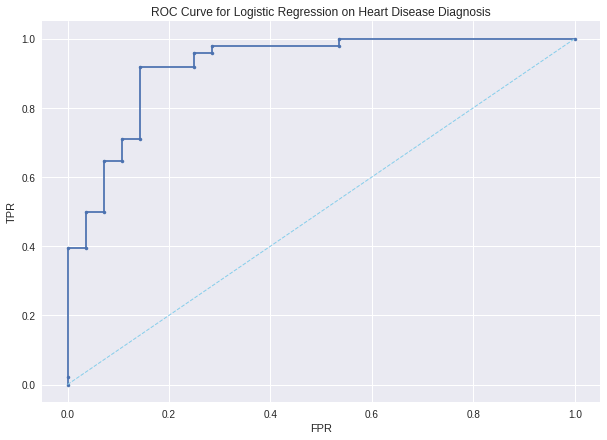

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score = lr.decision_function(X_test)

predictions = lr.predict(X_test)
decision_function = lr.decision_function(X_test)
log_likelihoods = lr.predict_log_proba(X_test)  # get log-probability for each value
probabilities = lr.predict_proba(X_test) # get probability for each value
decisions = np.argmax(probabilities, axis=1)  # select the larger column

# y_score input: Target scores, can either be probability estimates of the positive class, confidence values,
# or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_score)
lr_auc = roc_auc_score(y_test, y_score)
plt.figure(figsize=(10,7))
roc_curve = plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
_ = plt.title("ROC Curve for Logistic Regression on Heart Disease Diagnosis")
_ = plt.xlabel("FPR")
_ = plt.ylabel("TPR")
_ = plt.plot([0, 1], [0, 1], color='skyblue', lw=1, linestyle='--')

print("Training accuracy: " + str(lr.score(X_train, y_train)))
print("Testing accuracy: " + str(lr.score(X_test, y_test)))

c. Implement a function to plot the ROC curve of the model you get from the test set. (Hint: 1. check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) of logistic regression to get the probability output. 2. Loop through a list of probability thresholds for classification and calculate the Specificity and Sensitivity for each threshold value.)

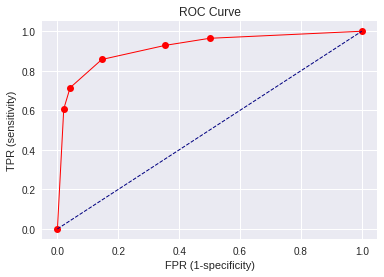

In [5]:
def roc_curve(predict_probabilities, thresholds, y_test):
    x = []
    y = []
    for threshold in thresholds:
        y_preds_given_threshold = [1 if p > threshold else 0 for p in predict_probabilities]
        TN = sum([1 for y_pred, y_t in zip(y_preds_given_threshold, y_test) if ((y_pred == y_t) and y_t == 0)])
        # Correct label was false, but we predicted true
        FP = sum([1 for y_pred, y_t in zip(y_preds_given_threshold, y_test) if y_pred != y_t and y_t == 0])
        TP = sum([1 for y_pred, y_t in zip(y_preds_given_threshold, y_test) if y_pred == y_t and y_t == 1])
        # Correct label was true, but we predicted false
        FN = sum([1 for y_pred, y_t in zip(y_preds_given_threshold, y_test) if y_pred != y_t and y_t == 1])
        sens = TP / float((TP + FN))
        spec = TN / float((TN + FP))
        tpr = sens
        fpr = 1-spec

        x.append(fpr)
        y.append(tpr)
        
    plt.plot(y, x, 'ro-', lw=1)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel("FPR (1-specificity)")
    plt.ylabel('TPR (sensitivity)')
    plt.title("ROC Curve")
    pass

# probabilities hold probablity for each class, 0 and 1. We will just use the first column
roc_curve(probabilities[::,0], np.linspace(0,1, 7), list(y_test)) 


a. Use the same dataset in Question 1 to train a classification model with the LDA algorithm. 

Give a prediction accuracy on the test set.

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
acc = lda.score(X_test, y_test)
acc

0.8552631578947368

b. Plot the ROC curve of the LDA model you trained in 2a on the test set. You can use the scikit-learn package.

Training accuracy: 0.8377192982456141
Testing accuracy: 0.8552631578947368
0.9196428571428571


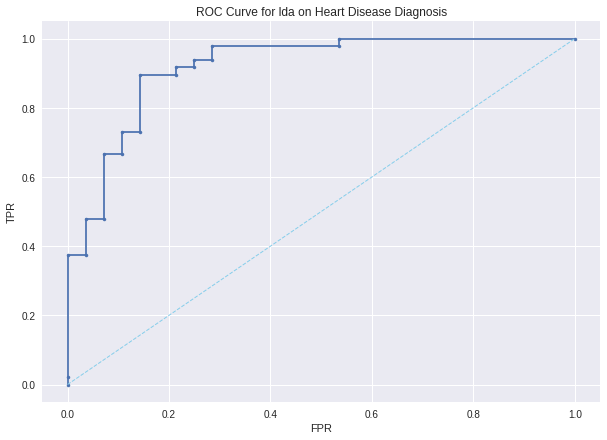

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score = lda.decision_function(X_test)

predictions = lda.predict(X_test)
decision_function = lda.decision_function(X_test)
log_likelihoods = lda.predict_log_proba(X_test)  # get log-probability for each value
probabilities = lda.predict_proba(X_test) # get probability for each value
decisions = np.argmax(probabilities, axis=1)  # select the larger column

# y_score input: Target scores, can either be probability estimates of the positive class, confidence values,
# or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_score)
lr_auc = roc_auc_score(y_test, y_score)
plt.figure(figsize=(10,7))
roc_curve = plt.plot(lr_fpr, lr_tpr, marker='.', label='lda')
_ = plt.title("ROC Curve for lda on Heart Disease Diagnosis")
_ = plt.xlabel("FPR")
_ = plt.ylabel("TPR")
_ = plt.plot([0, 1], [0, 1], color='skyblue', lw=1, linestyle='--')

print("Training accuracy: " + str(lda.score(X_train, y_train)))
print("Testing accuracy: " + str(lda.score(X_test, y_test)))
print(lr_auc)

c. Compare the ROC and accuracy on the test set that you get from Questions 1 and 2. 

Which algorithm performs better on this dataset? 

Explain your answer and hypothesize why one algorithm might be better than the other on this dataset.

<br>

For logistic regression, we obtained:

Training accuracy: 0.8508771929824561
Testing accuracy: 0.8552631578947368

For LDA we obtained:

Training accuracy: 0.8377192982456141
Testing accuracy: 0.8552631578947368

The ROCs look a bit different but they have the same accuracy on the test set. These two algorithms perform almost the same on this data set, depending on the input parameters of the logistic regression (LR) model. 

LR performs a bit better with the default parameters than with the parameters I left it with. Logistic regression doesn't have any specific assumptions about the normalness of predictor variable densities per class, but LDA assumes that we have normally distributed densities with equal means and different variances. 

In [8]:
print(np.var(train[train.target == 1], axis = 0))
print(np.var(test[test.target == 1], axis = 0))
print(np.mean(train[train.target == 1], axis = 0))
print(np.mean(test[test.target == 1], axis = 0))

Unnamed: 0    4373.003872
age             91.383008
sex              0.244722
cp               0.903353
trestbps       246.841698
chol          2978.720579
fbs              0.136022
restecg          0.244722
thalach        406.109139
exang            0.118051
oldpeak          0.573951
slope            0.317919
ca               0.661991
thal             0.211703
target           0.000000
dtype: float64
Unnamed: 0     514.478733
age             84.256510
sex              0.248264
cp               0.822483
trestbps       281.375000
chol          2514.051649
fbs              0.076389
restecg          0.270399
thalach        266.176649
exang            0.124566
oldpeak          0.683329
slope            0.416667
ca               0.847222
thal             0.222222
target           0.000000
dtype: float64
Unnamed: 0    113.623932
age            51.752137
sex             0.572650
cp              1.282051
trestbps      128.196581
chol          243.923077
fbs             0.162393
restecg        

References 

https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py